# Netzwerke und Netzwerkanalyse mit Python und NetworkX

- Mit NetworkX kann man vor allem gut Netzwerkdaten erzeugen. 
- Mit NetworkX kann man auch SNA betreiben. 
- Man kann aber wie wir auch morgen sehen werden für vieles Gephi nutzen. 
- SNA lässt sich für viele verschiedene Anwendungsszenarien einsetzen. 
- Doch dafür muss man wissen was es ist und was es nicht ist. Deswegen machen wir heute eine kleine Intro dazu. 


- Installieren:
- ```pip install networkx```
- ```pip install seaborn``` # visualisierung

In [1]:
!pip install networkx

zsh:1: /Users/plotti/Library/Python/3.7/bin/pip: bad interpreter: /usr/local/opt/python/bin/python3.7: no such file or directory
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


## Agenda

1. Eine Mini Einführung zu Graphen
2. Graphen erstellen und manipulieren mit NetworkX
    * Daten Strukturen: Graphs, DiGraphs, MultiGraphs and MultiDiGraphs.
    * Knoten und Kanten hinzufügen
    * Attribute für Knoten und Kanten
    * Graphen generatoren. 
    * Graphen visualisieren mit Matplotlib. 
    * Übliche Formate zum Lesen und Schreiben von Graphen. 
3. Netzwerkanalyse (SNA)
    * Einfachste Konzepte: Degree.
    * Distanzmetriken: paths and shortest paths.
    * Verschiedene Metriken für Zentralität.
4. Kanten und Knoten können alles sein
    * Kanten aufgrund von Likes
    * Kanten aufgrund von Kommunikation
    * Kanten aufgrund von gleicher Mitgliedschaft

## Eine mini Einleitung zu Graphen

![1](img/facebook.png)

Soziale Netzwerkanalyse ist der analytische Versuch soziale Strukuren und Phänmente in Form von Graphen auszudrücken. Der Ansatz ist relational, d.h. man fokussiert sich nicht auf die Akteure sondern auf ihre Beziehungen untereinander. 

Die untersuchten Netzwerke bestehen immer aus Knoten und Kanten. Knoten können sein: individuelle Personen, Firmen, Länder, Twitter-Accounts... Kanten können sein: Interaktionen, Geldflüsse, Emails, Telefonate, Handelsbeziehungen, etc...

Wir werden Graph und Netzwerk synonym gebrauchen. 

* Ein **Graph**   besteht aus einem Satz Knoten und und Kanten, die jeweils die Knoten verbinden. Die Größe des Graphens ist die Anzahl seiner Kanten. Zwei Knoten sind benachbart wenn sie durch eine Kante verbunden sind. 


* Der **küzreste Pfad** zwischen zwei Knoten ist der Pfad mit der minimalen Anzahl an Kanten. 


* Die **Entfernung** zwischen zwei Knoten ist die Länge des kürzesten Pfades. 


* Der **Durchmesser** eines Graphen ist dir längste kürzeste Pfad zwischen zwei Knoten. 


* Die **Dichte** eines Graphen misst wie viele Kanten im Verhältniss zur maximal möglichen Anzahl aller Kanten im Graphen vorhanden sind. 


* Der **Grad** eines Knotens wird durch die Anzahl der Kanten bestimmt die mit ihm verbunden sind. 

## Graphen erstellen mit NetworkX

NetworkX ist ein Paket für die Erstellung, Manipulation und Analyse von komplexen Netzwerken. 


In [2]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.5


### Daten Strukturen: Graphen,DiGraphs, MultiGraphs und MultiDiGraphs

* **Graph**: Undirektionaler Graph # z.B. Facebook

* **DiGraph**: Direktionaler Graph # z.B. Twitter

* **MultiGraph**: Unidirektionaler Graph mit mehreren Kanten # z.B. Freundschaften und Sex zwischen Personen

* **MultiDiGraph**: Direktionaler Graph mit mehrern Kanten # z.B. Emails und Whatsapp Nachrichten zwischen Personen

In [3]:
G = nx.Graph()
D = nx.DiGraph()
MG = nx.MultiGraph()
MDG = nx.MultiDiGraph()

#### Beispiel eines einfachen Graphen

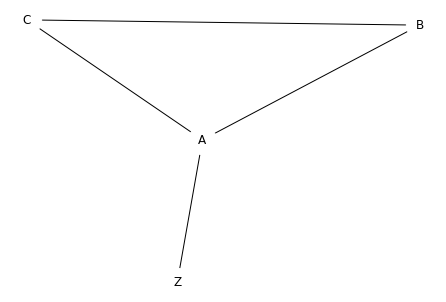

In [32]:
G = nx.Graph()
G.add_edges_from([('B', 'A'), ('A', 'C'), ('B', 'C'),("Z","A")])
nx.draw(G, node_size=800, node_color='white', with_labels=True)

Es gibt drei Arten Graphen zu darzustellen. Als:

**Adjacency Matrix** A $n x n$ matrix:

        0  1  1        G = [[0, 1, 1],
        1  0  1             [1, 0, 1],
        1  1  0             [1, 1, 0]]

Hier sind in jeder Reihe und Spalte jeweils die Personen. 

**Adjacency List** A list of neighbors:

        A: B, C        G = {'A': ['B', 'C'],
        B: A, C             'B': ['A', 'C'],
        C: A, B             'C': ['A', 'B']} 

Hier speichert man pro Person die Kanten ab. 

**Edge List** A list of edges:

        A B            G = [['A', 'B'],
        A C                 ['A', 'C'],
        B C                 ['B', 'C']]

Hier speichert man nur die Kanten ab und folgert so drauss dass Knoten existieren müssen. 

Network X speichert Graphen als Adjecency Listen ab, das ist schnell und recht leichtgewichtig. 

Wir können z.B. solche einfachen Sachen machen:

* **n in G** um zu schauen ob Knoten n sich im Graphen befindet
* **for n in G** über alle Knoten loopen
* **G[n]** alle Nachbarn von n holen 
* **len(G)** die Anzahl der Knoten in G holen 

Im Grunde funktioniert es so ein bisschen wie ein Dictionairy. 

In [29]:
print(G.adj)

{'B': {'A': {}, 'C': {}}, 'A': {'B': {}, 'C': {}}, 'C': {'A': {}, 'B': {}}}


In [33]:
'Z' in G

True

In [34]:
for n in G:
    print(n)

B
A
C
Z


In [35]:
G['A']

AtlasView({'B': {}, 'C': {}, 'Z': {}})

In [36]:
len(G)

4

### Graphen erstellen und Knoten und Kanten hinzufügen

Einen Graphen kann man auf zwei Weisen erstellen:

* Knoten hinzufügen mit: 
    - **G.add_node** : Einen Knoten hinzufügen
    - **G.add_nodes_from** : Gleich mehrere Knoten hinzufügen
* Kanten hinzufügen mit: 
    - **G.add_edge**: Eine Kante hinzufügen 
    - **G.add_edges_from** : Gleich mehrere Kanten hinzufügen


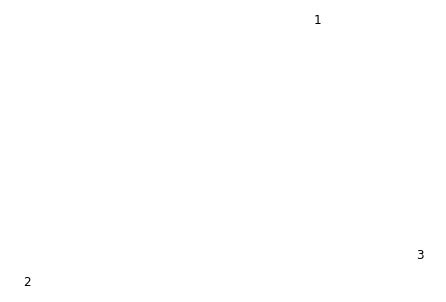

In [39]:
# Create an undirected Graph
G = nx.Graph()
# Einen Knoten
G.add_node(1)  
# Mehrere Knoten
G.add_nodes_from([2, 3])
nx.draw(G, node_size=800, node_color='white', with_labels=True)

Ein Graph kann auch durch das hinzufügen von Kanten erstellt werden. 

Falls die Kante schon existiert gibt es keinen Fehler. 

Falls die Knoten die zwischen denen die Kante exisiteren soll nicht existieren werden sie automatisch hinzugefügt. 

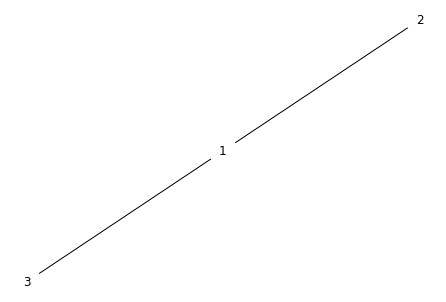

In [40]:
# Eine Kante
G.add_edge(1, 2)
# Mehrere Kanten
G.add_edges_from([(1, 2), (1, 3)])
nx.draw(G, node_size=800, node_color='white', with_labels=True)

Genau gleich kann man auch Knoten und Kanten entfernen. 

* Removing nodes with:
    - **G.remove_node** : Einen Knoten 
    - **G.remove_nodes_from** : Mehrere Knoten 
* Adding edges with:
    - **G.remove_edge**: Eine Kante 
    - **G.remove_edges_from** : Mehrere Kanten


### Attribute für Graphen, Knoten und Kanten 
Ein Graph, Knoten und Kanten können auch Attribute haben. So ähnlich wie ein Dict. 

In [41]:
# Dem Graphen Attribute geben 
G = nx.Graph(day='Friday', name='My Graph',duration="2weeks")
G.graph

{'day': 'Friday', 'name': 'My Graph', 'duration': '2weeks'}

In [42]:
# Verändern
G.graph['day']='Monday'
G.graph

{'day': 'Monday', 'name': 'My Graph', 'duration': '2weeks'}

#### Knoten Attribute

Die bisherigen Methoden können **G.add_node** und **G.add_nodes_from** können weiter benutzt werden. 

In [45]:
G.add_node(1, party='republican')
G.add_nodes_from([3,4,5], party='democrats') # mehrere Knoten
G.nodes[1]['party'] = "republican" # neues attribut hinzufügen
#nx.draw(G, node_size=800, node_color='white', with_labels=True)

Man kann Knoten mit ihren Attributen einfach überschreiben, es schmeisst keinen Fehler. 

In [52]:
G.add_node(1, age="55")

Man kann die Attribute natürlich auch wieder auslesen:

In [47]:
G.nodes[1]['party']

'republican'

In [48]:
#Die attribute sind ein normales dict
G.nodes[1]

{'party': 'republican'}

Normalerweise iterieren wir über die Knoten und ihre Attribute

In [49]:
# Ohne dass wir es networkx sagen gibt er die attribute nicht aus
list(G.nodes())

[1, 3, 4, 5]

In [53]:
# Mit data=True
list(G.nodes(data=True))

[(1, {'party': 'republican', 'age': '55'}),
 (3, {'party': 'liberals'}),
 (4, {'party': 'democrats'}),
 (5, {'party': 'democrats'})]

In [54]:
# Man kann auch das Attribut nennen an dem man interessiert ist
print(list(G.nodes(data='party')))

[(1, 'republican'), (3, 'liberals'), (4, 'democrats'), (5, 'democrats')]


#### Kanten Attribute

Funktioniert analog:

In [55]:
G.add_edge(1, 2, weight=4.0 )
G.add_edges_from([(3, 4),(4, 5)], color='red')
G.add_edges_from([(1, 2, {'color':'blue'}), (2, 3, {'weight':8})])
G[1][2]['weight'] = 4.0 #man kann auch existierenden kanten auch attribute geben

oder auch überschreiben, wenn man die Kante nochmals erzeugt

In [56]:
G.add_edge(3, 4, weight=12)

Um die Attribute rauszuholen gehts analog:

In [57]:
G[1][2]['weight'] # or  G.edge[1][2]['weight']

4.0

In [58]:
# Oder alle attribute bekommen
G[1][2] 

{'weight': 4.0, 'color': 'blue'}

In der Praxis iterieren wir einfach über Kanten und ihre Attribute

In [59]:
# Edges without attributes
list(G.edges())

[(1, 2), (3, 4), (3, 2), (4, 5)]

In [60]:
# Edges as tuples of nodes and edge attributes
list(G.edges(data=True))

[(1, 2, {'weight': 4.0, 'color': 'blue'}),
 (3, 4, {'color': 'red', 'weight': 12}),
 (3, 2, {'weight': 8}),
 (4, 5, {'color': 'red'})]

In [61]:
# Analog kann man auch das Attribut angeben an dem man interessiert ist:
print(list(G.edges(data='weight')))

[(1, 2, 4.0), (3, 4, 12), (3, 2, 8), (4, 5, None)]


Ein ganz praktischer Befehl ist: **nx.info**

In [62]:
print(nx.info(G))

Name: My Graph
Type: Graph
Number of nodes: 5
Number of edges: 4
Average degree:   1.6000


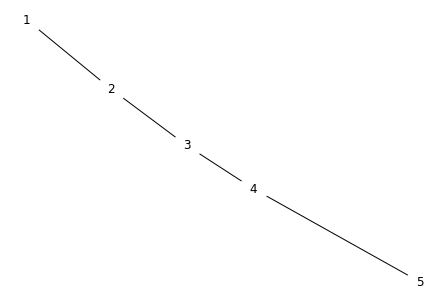

In [63]:
nx.draw(G, node_size=800, node_color='white', with_labels=True)

### Aufgabe: Graphen bauen

Baut einen Graphen mit den Nachbarländern der Schweiz. Eine Beziehung soll immer dann existieren wenn das Land mit dem anderen Land eine Grenze hat. 

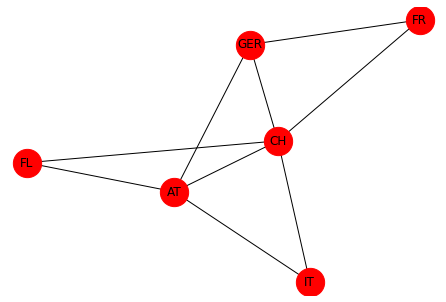

In [70]:
G1 = nx.Graph()
#G1.add_node("CH")
#G1.add_edge("CH","DE")
#G1.add_edge("CH","IT")
G1.add_edges_from([("CH","GER"),("CH","AT"), ("CH","FR"), ("CH","IT"), ("CH", "FL"),("GER","FR"),("GER","AT"),("FL","AT"), ("AT","IT")]) # dein code hier
nx.draw(G1, node_size=800, node_color='red', with_labels=True)

### Es gibt auch mehr Wege mit Graphen zu arbeiten

Hier ein paar Beispiele

* **nx.subgraph(G, node_list)** : gib mir nur einen Teil des Graphen in dem diese Knoten drin sind
* **nx.union(G1,G2)** : vereinige zwei Graphen
* **nx.compose(G1,G2)**:  vereinige zwei Graphen in der Schnittmenge der Knoten

In [75]:
#U = nx.union(G2,G3)
#nx.draw(U, node_size=800, node_color='red', with_labels=True)

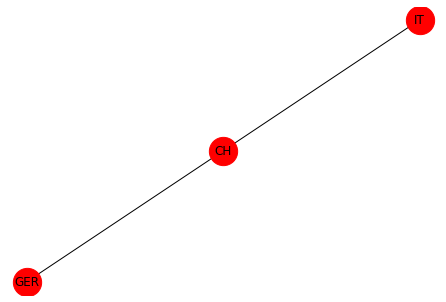

In [73]:
G2 = nx.subgraph(G1,["CH","GER","IT"])
G3 = nx.subgraph(G1,["AT","FL","FR"])
nx.draw(G2, node_size=800, node_color='red', with_labels=True)

### Graph Generators

NetworkX hat auch ein paar Beispielgraphen [hier](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html). 

Für uns ganz so wichtig - aber faszinierend: Diese Graphen haben teilweise besondere Eigenschaften die Wissenschaftler interessieren. 

Hier zwei Beispiele für sog. Small World Networks: 
- https://www.netlogoweb.org/launch#https://www.netlogoweb.org/assets/modelslib/Sample%20Models/Networks/Preferential%20Attachment.nlogo
- https://www.netlogoweb.org/launch#https://www.netlogoweb.org/assets/modelslib/Sample%20Models/Networks/Small%20Worlds.nlogo

Beispiele in nx:

In [ ]:
# small graphs
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

# classic graphs
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

# random graphs
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

### Graphen mit NetworkX zeichnen. 

NetworkX ist nicht dazu gedacht Graphen zu visualisieren, man kann aber mit Matplotlib so einiges hinbekommen, vor allem wenn die Graphen einfach sind. Wenn sie groß werden nutzen wir dann Gephi.

Nehmen wir einen Beispielgraph, die Florentinischen Familien von Romeo und Julia:

In [76]:
G = nx.florentine_families_graph()

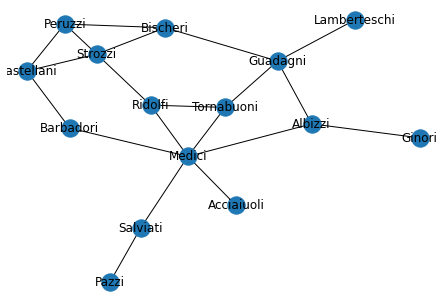

In [83]:
# The function nx.draw is main entry point for NetworkX plotting functions
nx.draw(G,with_labels=True)

Der default Layout ist der sog. spring Layout. Hier stoßen sich die Knoten gegenseitig ab und er versucht ein Layout zu finden bei dem jeder Knoten an seiner "optimalen" position liegt. 

Man kann aber auch andere Layouts vorrausberechten und sie dann zur  **nx.draw** Funktion übergeben. 

In [84]:
pos_spring = nx.spring_layout(G)
pos_fr = nx.fruchterman_reingold_layout(G)
pos_fr

{'Acciaiuoli': array([ 0.08969644, -0.50431064]),
 'Medici': array([ 0.0331381 , -0.09310802]),
 'Castellani': array([-0.48715029,  0.68115192]),
 'Peruzzi': array([-0.63118206,  0.43227218]),
 'Strozzi': array([-0.40615658,  0.43013245]),
 'Barbadori': array([-0.16390302,  0.44131719]),
 'Ridolfi': array([-0.04368369,  0.25080339]),
 'Tornabuoni': array([0.2224421 , 0.17419255]),
 'Albizzi': array([ 0.56610001, -0.03858099]),
 'Salviati': array([-0.28019287, -0.56868283]),
 'Pazzi': array([-0.49211025, -0.9290257 ]),
 'Bischeri': array([-0.27863775,  0.15997639]),
 'Guadagni': array([ 0.26925054, -0.06368349]),
 'Ginori': array([1.        , 0.00307355]),
 'Lamberteschi': array([ 0.60238933, -0.37552796])}

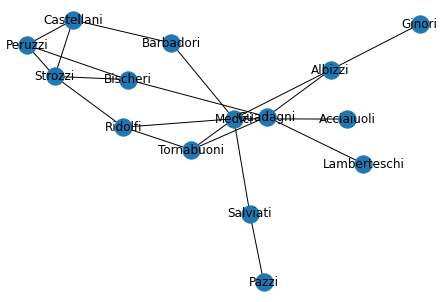

In [91]:
nx.draw(G, pos=pos_spring,with_labels=True)

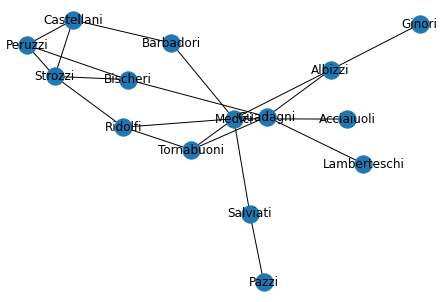

In [92]:
nx.draw(G, pos=pos_spring,with_labels=True)

Wir können auch die Farbe sowie Beschriftung der Knoten und Kanten anpassen mit den Parametern von **nx.draw**:

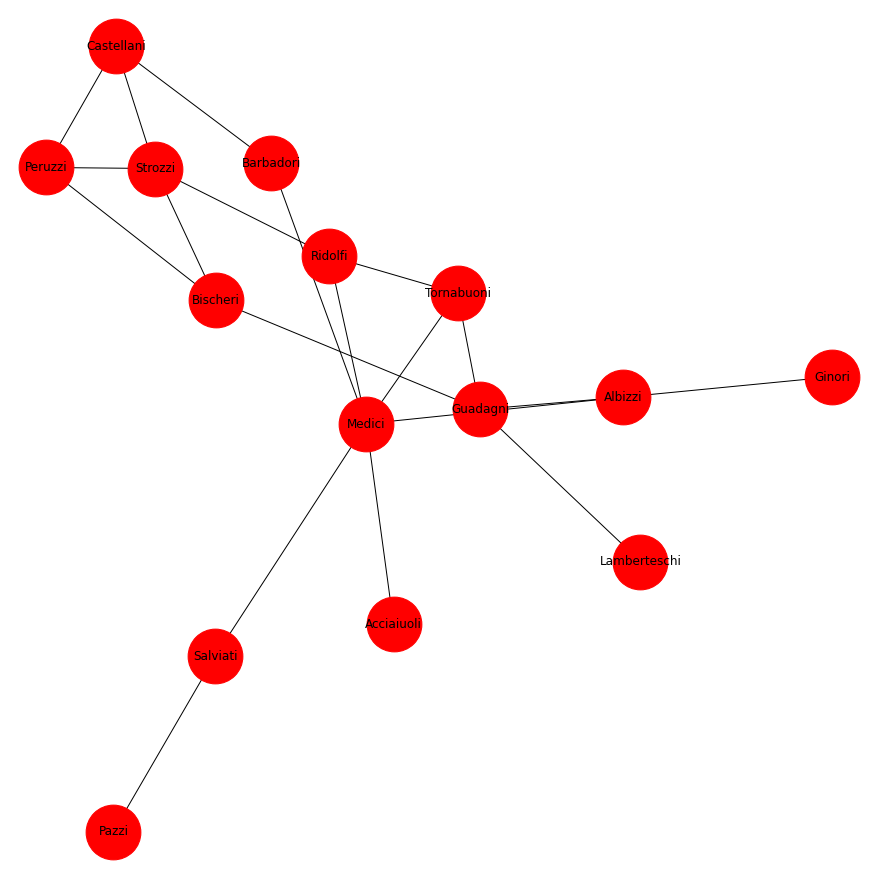

In [94]:
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos_fr, node_size=3000, node_color='red', with_labels=True)

Wenn man komplexere Plots machen möchte, zb. Knoten bestimmte Farben oder Größen geben oder bestimmte Kanten hervorheben geht das mit den folgenden Funktionen: 

* **nx.draw_networkx_nodes**
* **nx.draw_networkx_edges**
* **nx.draw_networkx_lables**
* **nx.draw_networkx_edge_lables**

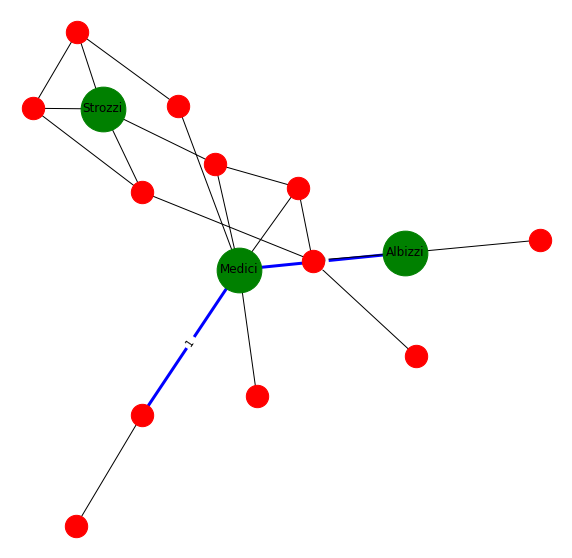

In [96]:
plt.figure(figsize=(10,10))
big_and_green_nodes = {'Medici', 'Albizzi', 'Strozzi'}
other_nodes = set(G) - big_and_green_nodes
thick_edges = {('Medici', 'Albizzi'), ('Medici', 'Salviati')}
other_edges = set(G.edges()) - thick_edges
# Plot nodes
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=big_and_green_nodes, node_size=2000, node_color='green')
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=other_nodes, node_size=500, node_color='red')
# Plot edges 
nx.draw_networkx_edges(G, pos=pos_fr, edgelist=thick_edges, width=3, edge_color='blue')
nx.draw_networkx_edges(G, pos=pos_fr, edgelist=other_edges)
# Plot node labels
nx.draw_networkx_labels(G, pos=pos_fr, labels={n: n for n in big_and_green_nodes})
# Plot edge labels
nx.draw_networkx_edge_labels(G, pos=pos_fr, edge_labels={e: i for i, e in enumerate(thick_edges)})
# Remove axes
ax = plt.gca()
ax.set_axis_off()

### Übliche Formate um Graphen zu lesen und zu schreiben

Die komplette Liste [aller Formate](https://networkx.github.io/documentation/stable/reference/readwrite/index.html) findet sich online. 

Hier ein paar Beispiele:

* **Adjacency list** Einfaches Format, keine Attribute
    - **nx.read_adjlist**
    - **nx.write_adjlist**
* **Edge list** Einfaches Format, keine Attribute
    - **nx.read_edgelist**
    - **nx.write_adjlist**
* **GEXF** Entworfen als standard exchange format für graphen (Gephi)
    - **nx.read_gexf**
    - **nx.write_gexf**
* **Pickle** Python standard Modul um Daten auf Festplatte zu schreiben
    - **nx.read_gpickle**
    - **nx.write_gpickle**
* **GraphML** An XML-based Format für graphen 
    - **nx.read_graphml**
    - **nx.write_graphml**
* **Pajek** Format für Pajek, eines der Urprogramme für SNA
    - **nx.read_pajek**
    - **nx.write_pajek**

In [97]:
nx.write_gexf(G1,"plotti.gexf")

## Netzwerkanalyse

Jetzt probieren wir ein paar einfache Analysetechniken aus, die uns etwas über die Struktur des Graphen und der Wichtigkeit der Knoten verrraten. 

### Basic : Degree

Der degree ist die Anzahl der Kanten die mit dem Knoten verbunden sind. 

* **undirected graphs** gleich der Anzahl der Nachbarn. 

* **directed graphs** müssen wir zwischen rein-kommenden und raus-gehenden Kanten unterscheiden.
    - **In-degree** Number of predecessors
    - **Out-degree** Nuber of successors

#### Undirected Graphs

{0: 3, 1: 2, 2: 2, 3: 2, 4: 2, 5: 1}

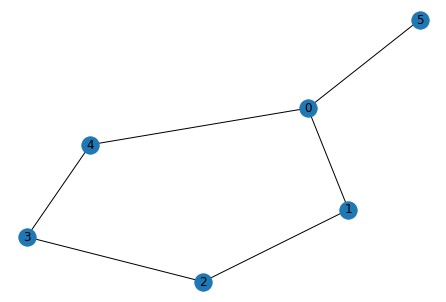

In [99]:
G = nx.cycle_graph(5)
G.add_edge(0, 5)
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)
dict(G.degree())

In [100]:
# Man kann auch den degree für einen einzelenn Knoten haben
G.degree(5)

1

#### Kleine Beispiele
Wie bekommt man den Knoten mit dem höchsten degree?

In [104]:
max(G, key=G.degree)

0

Wie bekommt man alle Nachbarn von Knoten 0?

In [105]:
list(G.neighbors(0))

[1, 4, 5]

#### Directed Graphs

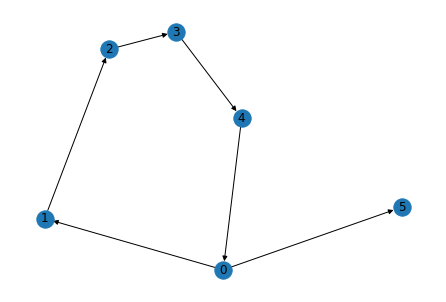

In [109]:
D = nx.cycle_graph(5, create_using=nx.DiGraph())
D.add_edge(0, 5)
nx.draw(D, pos=nx.fruchterman_reingold_layout(D), with_labels=True)

In [110]:
dict(D.in_degree())

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1}

In [111]:
dict(D.out_degree())

{0: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0}

In [113]:
#D.degree() #dont

#### Kleine Beispiele

Wie bekommen wir alle "Nachfolger" des Knoten 0?

In [116]:
#G.successors(0)

In [117]:
list(D.successors(0))

[1, 5]

In [45]:
# oder Vorgänger?
list(D.predecessors(0))

[4]

#### Gewichtete Graphen und gewichteter degree 

Kanten können Attribute haben und das wichtigste ist **weight** mit dem man angibt wie stark die Kante ist. 

Der gewichtete degree eines Knotens ist eben die summe der gewichteten Kanten. 

{(0, 1): Text(0.35105186939923605, 0.6222252306798999, '1'),
 (0, 4): Text(0.7411279904462433, -0.2306635793870458, '2'),
 (1, 2): Text(-0.5611488028730219, 0.5581556315530946, '3'),
 (2, 3): Text(-0.5921798598454784, -0.2550638159744417, '4'),
 (3, 4): Text(0.061148802873022906, -0.6946534668715078, '5')}

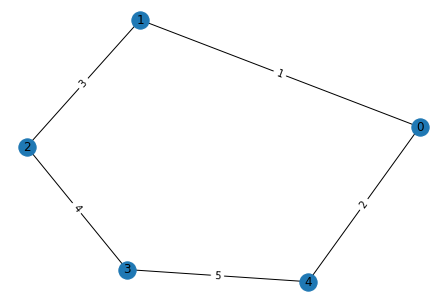

In [118]:
W = nx.cycle_graph(5)
for i, (u, v) in enumerate(W.edges(), 1):
    W[u][v]['weight'] = i
pos = nx.spring_layout(W)
nx.draw(W, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(W, pos, edge_labels=nx.get_edge_attributes(W, 'weight'))

In [119]:
dict(W.degree())

{0: 2, 1: 2, 2: 2, 3: 2, 4: 2}

In [120]:
dict(W.degree(weight='weight'))

{0: 3, 1: 4, 2: 7, 3: 9, 4: 7}

#### Kleine Beispiele

Wie können wir den Knoten mit dem größten gewichteten Degree bekommen?

In [122]:
wdegree = dict(W.degree(weight='weight'))
wdegree

{0: 3, 1: 4, 2: 7, 3: 9, 4: 7}

In [121]:
wdegree = dict(W.degree(weight='weight'))
max(W, key=wdegree.get)

3

### Pfade und kürzeste Pfade

Mit NetworkX können wir bestimmen ob Knoten auf einem Pfad liegen oder wo die kürzesten Pfade lang laufen.

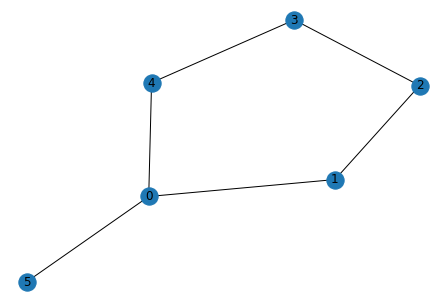

In [123]:
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)

#### Undirected Graphs

In [126]:
nx.has_path(G, 0, 3)

True

In [143]:
nx.shortest_path(G, 0, 3)

[0, 4, 3]

In [130]:
nx.shortest_path_length(G, 0, 3)

2

Man kann auch alle Kanten die auf diesem Pfad liegen bestimmen:

In [135]:
list(zip(path, path[1:]))

[(0, 4), (4, 3)]

In [136]:
path = nx.shortest_path(G, 0, 3)
path_edges = list(zip(path, path[1:]))
print("nodes in path: {}".format(path))
print("edges in path: {}".format(path_edges))

nodes in path: [0, 4, 3]
edges in path: [(0, 4), (4, 3)]


Man kann auch alle möglichen kürzesten Pfade für einen Knoten zu den anderen Knoten bestimmen.

In [137]:
nx.single_source_shortest_path(G, 0)

{0: [0], 1: [0, 1], 4: [0, 4], 5: [0, 5], 2: [0, 1, 2], 3: [0, 4, 3]}

#### Directed Graphs

Für gerictete Graphen müssen wir den Kantenrichtung folgen

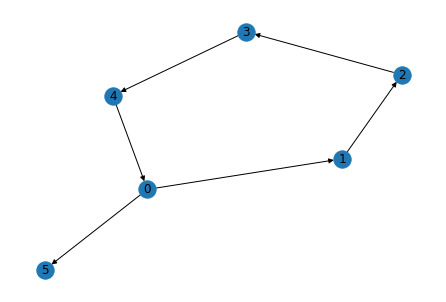

In [138]:
nx.draw(D, pos=nx.fruchterman_reingold_layout(G), with_labels=True)

In [140]:
nx.has_path(D, 5, 3)

False

In [141]:
list(nx.all_simple_paths(D, 0, 3))

[[0, 1, 2, 3]]

In [142]:
nx.shortest_path(D, 0, 3)

[0, 1, 2, 3]

In [144]:
nx.shortest_path_length(D, 0, 3)

3

In [145]:
nx.single_source_shortest_path(D, 0)

{0: [0],
 1: [0, 1],
 5: [0, 5],
 2: [0, 1, 2],
 3: [0, 1, 2, 3],
 4: [0, 1, 2, 3, 4]}

#### Weighted Graphs

Für gewichtete Grpahen müssen wir natürlich das Gewicht berücksichtigen. Der kürzeste Pfad liegt ja damit somit nicht mehr immer dort wo man am wenigsten Knoten passieren muss. 

Für gewichtete Graphen müssen wir das Gewicht in Form von **weight** mitgeben:

{('a', 'b'): Text(0.03234027460165928, 0.5682612790299659, '0.3'),
 ('a', 'c'): Text(-0.2210174488409146, 0.11653917086759798, '2.0'),
 ('b', 'c'): Text(0.20440189537113193, 0.31519955010243583, '0.5'),
 ('c', 'd'): Text(-0.03234027460165934, -0.568261279029966, '1.0')}

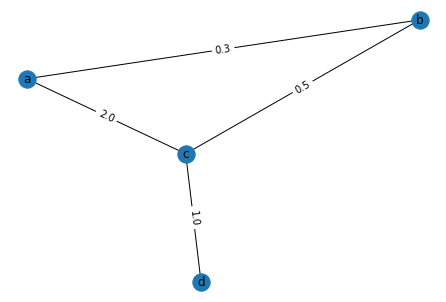

In [146]:
W = nx.Graph()
W.add_edge('a', 'b', weight=0.3)
W.add_edge('b', 'c', weight=0.5)
W.add_edge('a', 'c', weight=2.0)
W.add_edge('c', 'd', weight=1.0)
pos = nx.fruchterman_reingold_layout(W)
nx.draw(W, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(W, pos, edge_labels=nx.get_edge_attributes(W, 'weight'))

In [147]:
nx.shortest_path(W, 'a', 'd')

['a', 'c', 'd']

In [64]:
nx.shortest_path(W, 'a', 'd',weight='weight')

['a', 'b', 'c', 'd']

In [148]:
nx.shortest_path_length(W, 'a', 'd',weight='weight')

1.8

### Beispiel für die Florentinischen Familien

Kürzeste Pfade müssen nicht unique sein, es gibt mehrere Wege zum Ziel. Mit 
**nx.all_shortest_paths** bekommt man alle kürzesten Pfade. 

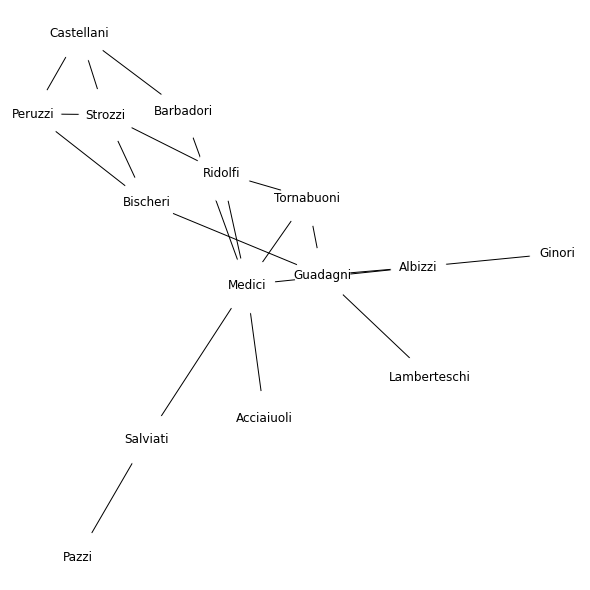

In [150]:
G = nx.florentine_families_graph()
plt.figure(figsize=(8,8))
nx.draw(G, pos=pos_fr, node_size=3000, node_color='white', with_labels=True)

In [151]:
source = 'Medici'
target = 'Peruzzi'
nx.shortest_path(G, source, target)

['Medici', 'Barbadori', 'Castellani', 'Peruzzi']

In [152]:
# Shortest paths are not unique
list(nx.all_shortest_paths(G, source, target))

[['Medici', 'Barbadori', 'Castellani', 'Peruzzi'],
 ['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']]

In [155]:
def plot_paths(G, paths):
    plt.figure(figsize=(12,12))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=3000, node_color='white')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

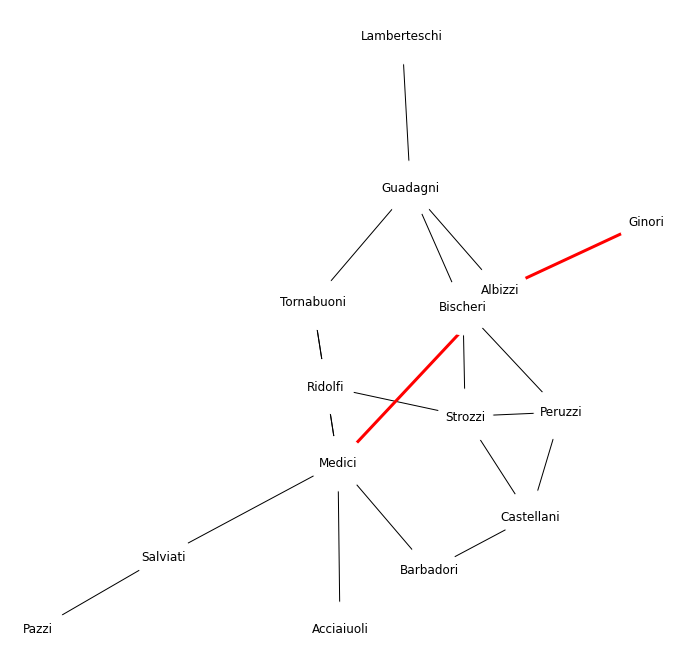

In [156]:
source = 'Medici'
target = 'Ginori'
plot_paths(G, [nx.shortest_path(G, source, target)])

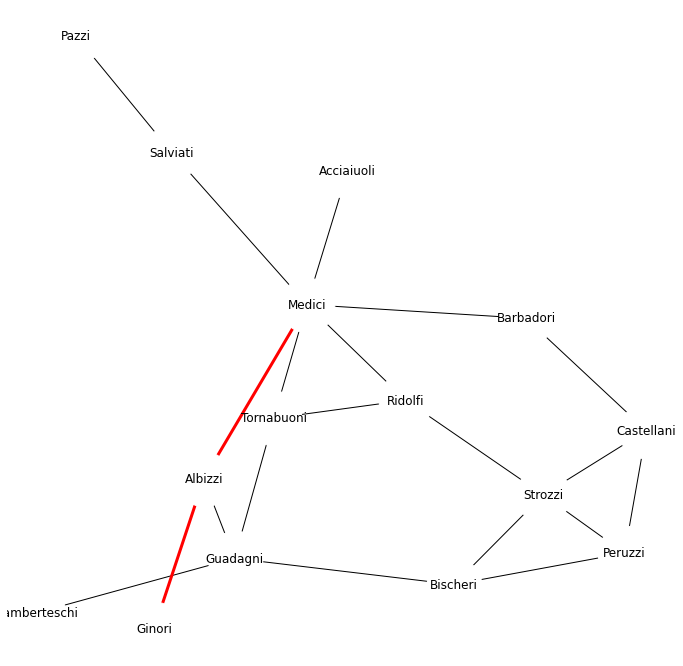

In [157]:
plot_paths(G, nx.all_shortest_paths(G, source, target))

### Node centrality Analyse

Die Zentralitätsanalyse erlaubt uns die wichtigsten - zentralsten - Akteure des Netzwerks zu bestimmen. Es gibt einen [Haufen](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html)  verschiedener Zentralitätsmaße, sie kommen zu unterschiedlichen Resultaten - je nachdem was uns interessiert. 

Wir schauen uns das mal bei den Familien an, hier bedeutet eine Kante dass eine Hochzeit zwischen zwei Familien stattgefunden hat. 

Anfang des 14 Jahrhunderts waren die Medici nicht nur die reichsten aber auch eine der mächtigsten Familien in Florenz. 

Mit Hilfe der Netzwerkanalyse können wir zeigen, dass ihre zentrale Position dafür verantwortlich war. 

In [158]:
G = nx.florentine_families_graph()

### Degree Centrality

Degree centrality ist die Anzahl der Kanten eines Knotens. Wieviele Nachbarn habe ich im Verhältniss zu wieviele könnte ich maximal haben. 

Der Output von **nx.degree_centrality** ist ein dict, bei dem der value die degree centrality enthält. 

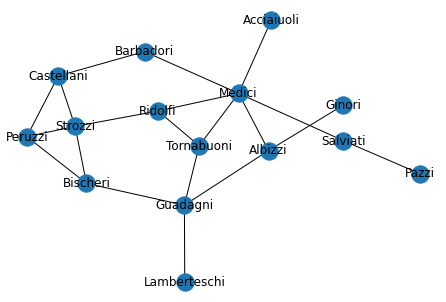

In [159]:
nx.draw(G,with_labels=True)

In [160]:
from operator import itemgetter

In [161]:
degc = nx.degree_centrality(G)
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.42857142857142855),
 ('Strozzi', 0.2857142857142857),
 ('Guadagni', 0.2857142857142857),
 ('Castellani', 0.21428571428571427),
 ('Peruzzi', 0.21428571428571427),
 ('Ridolfi', 0.21428571428571427),
 ('Tornabuoni', 0.21428571428571427),
 ('Albizzi', 0.21428571428571427),
 ('Bischeri', 0.21428571428571427),
 ('Barbadori', 0.14285714285714285),
 ('Salviati', 0.14285714285714285),
 ('Acciaiuoli', 0.07142857142857142),
 ('Pazzi', 0.07142857142857142),
 ('Ginori', 0.07142857142857142),
 ('Lamberteschi', 0.07142857142857142)]

### Betweenness centrality

Die Betweenness centrality eines Knotens  `v` enspricht der Summe der Anteile aller kürzesten Pfade die durch diesen Knoten laufen: 

$$ c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)} $$

 `V` sind die Knoten,  $\sigma(s, t)$ ist die Summe der Kürzesten Pfade `(s, t)`,  and $\sigma(s, t|v)$ is the Summe der kürzesten Pfade die durch `v` verlaufen.
 
 Kurz gesagt Knoten die mehrere Personen verbinden, oder oft dazwischen liegen haben eine hohe Betweenness. 

Ein Graph mit zwei Comminities die über eine Person verbunden werden. Diese Person hat einen hohe Betweeness Centrality.

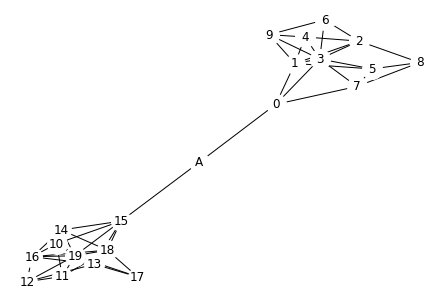

In [162]:
done = False
while not done:
    B = nx.disjoint_union(nx.fast_gnp_random_graph(10, 0.5), nx.fast_gnp_random_graph(10, 0.5))
    B.add_edges_from([('A', 0), ('A', 15)])
    try:
        eig = nx.eigenvector_centrality(B)
        if nx.is_connected(B):
            done = True
    except:
        pass
nx.draw(B, node_size=400, node_color='white', with_labels=True)

Wie sieht das aus für unsere florentinischen Familien?

In [163]:
bet = nx.betweenness_centrality(G)
# let's list the scores
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.521978021978022),
 ('Guadagni', 0.2545787545787546),
 ('Albizzi', 0.21245421245421245),
 ('Salviati', 0.14285714285714288),
 ('Ridolfi', 0.11355311355311355),
 ('Bischeri', 0.1043956043956044),
 ('Strozzi', 0.10256410256410257),
 ('Barbadori', 0.09340659340659341),
 ('Tornabuoni', 0.09157509157509157),
 ('Castellani', 0.05494505494505495),
 ('Peruzzi', 0.02197802197802198),
 ('Acciaiuoli', 0.0),
 ('Pazzi', 0.0),
 ('Ginori', 0.0),
 ('Lamberteschi', 0.0)]

### Closeness centrality

Closness centrality ist die summe der Kürzesten Pfade vom Knoten zu allen anderen Knoten. Da diese Summe von der Anzahl der Knoten im Graphen abhängt wird sie durch die Summe aller möglichen Entfernungen normiert. 

$$C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$$

wo `d(v, u)` der kürzeste Pfad zwischen `v` und `u` ist und `n` ist die Anzahl der Knoten im Graphen. Höhere Werte enstprechen höherer closness centrality. 


In [164]:
clos = nx.closeness_centrality(G)
# let's list the scores
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.56),
 ('Ridolfi', 0.5),
 ('Tornabuoni', 0.4827586206896552),
 ('Albizzi', 0.4827586206896552),
 ('Guadagni', 0.4666666666666667),
 ('Strozzi', 0.4375),
 ('Barbadori', 0.4375),
 ('Bischeri', 0.4),
 ('Castellani', 0.3888888888888889),
 ('Salviati', 0.3888888888888889),
 ('Acciaiuoli', 0.3684210526315789),
 ('Peruzzi', 0.3684210526315789),
 ('Ginori', 0.3333333333333333),
 ('Lamberteschi', 0.32558139534883723),
 ('Pazzi', 0.2857142857142857)]

### Eigenvector Centrality

Eigenvector centrality gibt jedem Knoten relative gewichte, basierend auf der Idee dass Knoten mit hohen Gewichten auch viel zur Zentrelität beitragen als Knoten mit niedrigen Gewichten.  

Googles pagerank ist eine variante der Eigenvektor zentralität. (NetworkX kann auch pagerank)
![1](img/corleone.png)

In [165]:
eig = nx.eigenvector_centrality(G)
# let's list the scores
sorted(eig.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.4303154258349923),
 ('Strozzi', 0.3559730326460451),
 ('Ridolfi', 0.3415544259074365),
 ('Tornabuoni', 0.325846704169574),
 ('Guadagni', 0.2891171573226501),
 ('Bischeri', 0.2827943958713356),
 ('Peruzzi', 0.2757224374104833),
 ('Castellani', 0.2590200378423514),
 ('Albizzi', 0.2439605296754477),
 ('Barbadori', 0.2117057470647985),
 ('Salviati', 0.14592084164171834),
 ('Acciaiuoli', 0.1321573195285342),
 ('Lamberteschi', 0.08879253113499548),
 ('Ginori', 0.0749245316027793),
 ('Pazzi', 0.044814939703863084)]

# Community detection
- Man kann auch mit Zusatzmodulen automatisch Communities detecten, was sehr praktisch ist. Aber in Gephi geht das ganze noch schöner...
- ```pip3 install python-louvain```

In [166]:
!pip install python-louvain

zsh:1: /Users/plotti/Library/Python/3.7/bin/pip: bad interpreter: /usr/local/opt/python/bin/python3.7: no such file or directory
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


34 nodes, 78 edges


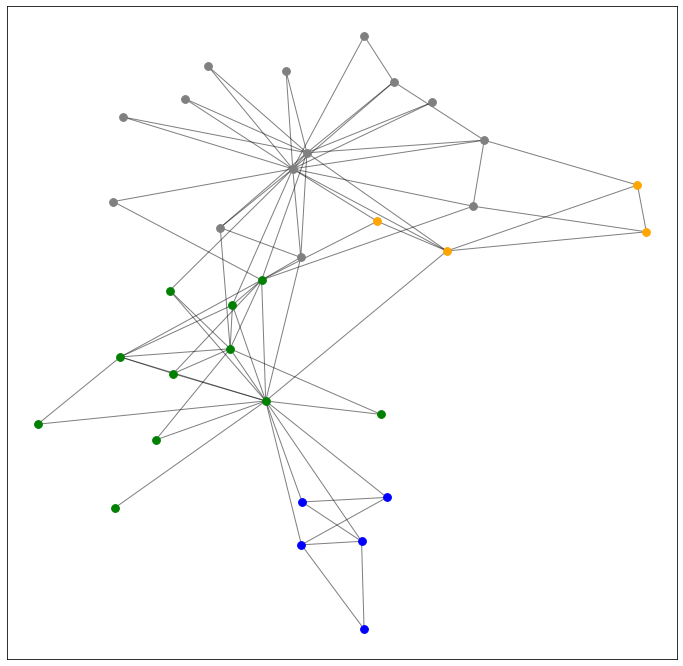

In [167]:
import networkx as nx
import community
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

# Load standard "Karate club" graph
G = nx.karate_club_graph()

print("%d nodes, %d edges" % ( len(G.nodes()), len(G.edges()) ))

# Apply Louvain algorithm
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0
colors = ["red","green","blue","grey","orange"]
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 60,
                                node_color = colors[count])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

# Kanten und Knoten

Wichtig ist dass Knoten und Kanten im Grunde alles sein können. Ihr müsst hier richtig kreativ werden. Hier ein paar Beispiele:

## Offensichtliche Kanten
 ![1](img/2.png)
 Stromlinien als Kanten
 ![1](img/3.png)
 Flüge als Kanten
 ![1](img/4.png)
 U-Bahnverbindungen als Kanten
 ![1](img/7.png)
 Nervenbahnen als Kanten

## Kanten aufgrund von Kommunikation (z.B. Twitter)
![1](img/5.png)
Twitter-Following als Kante
![1](img/6.png)
Twitter-Following als Kante
![1](img/8.png)
Sexuelle Beziehungen als Kante
![1](img/9.png)
Sexuelle Beziehungen als Kante
![1](img/10.png)

## Kanten aufgrund von Likes (z.B. Facebook)
![1](img/facebook.png)

## Kanten aufgrund von gleicher Mitgliedschaft (z.B. Aufsichtsräte in Firmen)
Abteilungsmitgliedschaft als Kante
![1](img/11.png)
Zusammenarbeit in Papern als Kante
![1](img/1.png)
Kanten Aufgrund gleichen Vorkommens in Rezepten


# Weiterführende Literatur

- http://www.yasiv.com/#/Search?q=social%20network%20analysis&category=Books&lang=US
![1](img/yassiv.png)